# Лабораторная работа №4. Фильтрация и выделение контуров

Nasution 932101

In [ ]:
!pip install cv

# Оригинальное изображение

Mounted at /content/drive


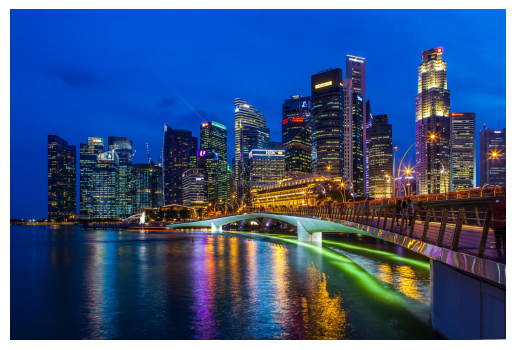

In [ ]:
import cv2
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/My Drive/city_pict.jpg'  # Change this path to your image path in Google Drive
image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.axis('off')
plt.show()


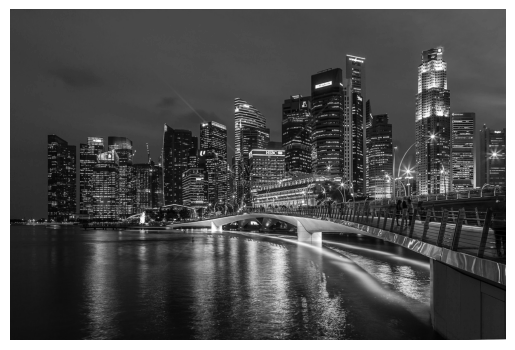

In [ ]:
# white-grey-black color

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

# Типы шумов

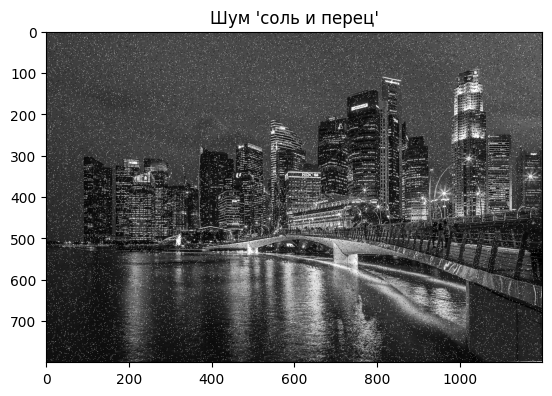

In [ ]:
image= image_path
# Загрузка изображения
image = cv2.imread(image , cv2.IMREAD_GRAYSCALE)

# Добавление шума "соль и перец"
sp_noise_img = random_noise(image, mode='s&p', amount=0.05)
sp_noise_img = np.array(255 * sp_noise_img, dtype='uint8')

# Добавление гауссовского шума
gaussian_noise_img = random_noise(image, mode='gaussian', var=0.01)
gaussian_noise_img = np.array(255 * gaussian_noise_img, dtype='uint8')

# Добавление спекл-шума
speckle_noise_img = random_noise(image, mode='speckle', var=0.01)
speckle_noise_img = np.array(255 * speckle_noise_img, dtype='uint8')

# Отображение изображения с шумом "соль и перец"
plt.imshow(sp_noise_img, cmap='gray')
plt.title("Шум 'соль и перец'")
plt.show()


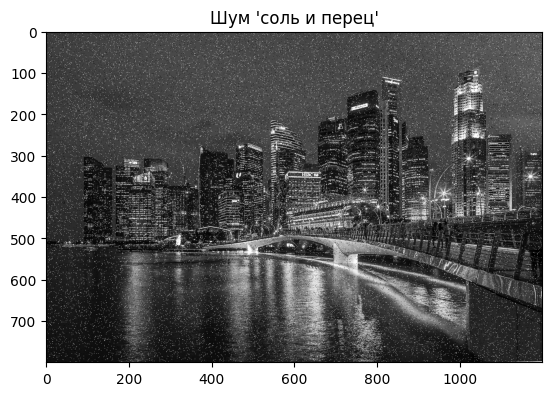

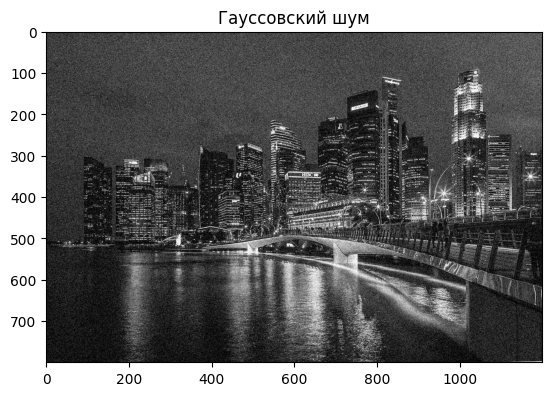

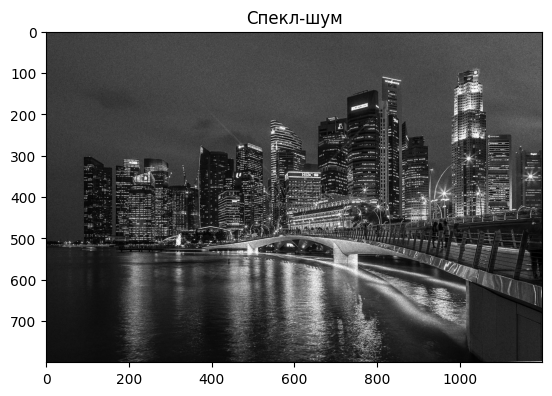

In [ ]:
image = image_path
# Чтение изображения в оттенках серого (используется режим IMREAD_GRAYSCALE для преобразования в черно-белое изображение)
image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Применение шума "соль и перец" (добавляет случайные черные и белые пиксели к изображению)
sp_noise_img = random_noise(image, mode='s&p', amount=0.05)
sp_noise_img = np.array(255 * sp_noise_img, dtype='uint8')

# Применение гауссовского шума (добавляет к каждому пикселю случайное значение, взятое из нормального распределения)
gaussian_noise_img = random_noise(image, mode='gaussian', var=0.01)
gaussian_noise_img = np.array(255 * gaussian_noise_img, dtype='uint8')

# Применение спекл-шума (умножает интенсивности пикселей на случайные значения, имитируя спекл-шум)
speckle_noise_img = random_noise(image, mode='speckle', var=0.01)
speckle_noise_img = np.array(255 * speckle_noise_img, dtype='uint8')

# Отображение изображения с шумом "соль и перец"
plt.imshow(sp_noise_img, cmap='gray')
plt.title("Шум 'соль и перец'")
plt.show()

# Отображение изображения с гауссовским шумом
plt.imshow(gaussian_noise_img, cmap='gray')
plt.title("Гауссовский шум")
plt.show()

# Отображение изображения со спекл-шумом
plt.imshow(speckle_noise_img, cmap='gray')
plt.title("Спекл-шум")
plt.show()


# Низкочастотная фильтрация (Гауссов фильтр и контргармонический фильтр)

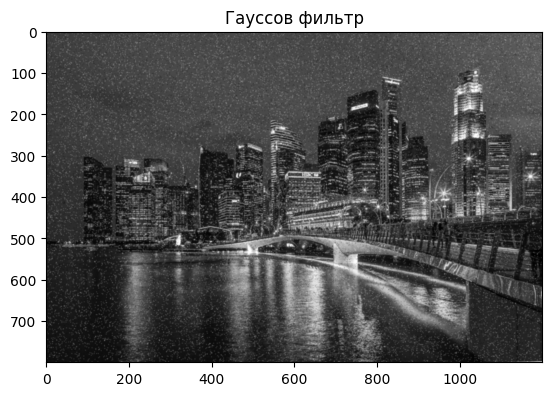

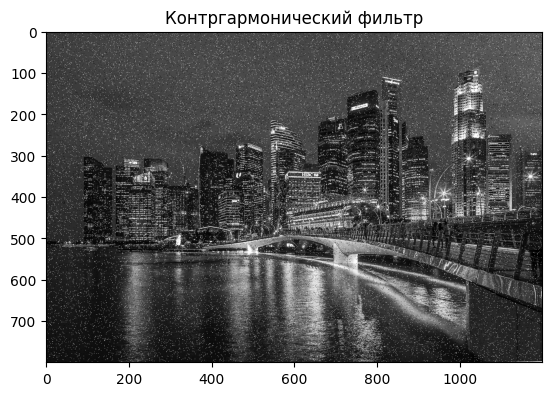

In [ ]:
# Гауссов фильтр
gaussian_filtered = cv2.GaussianBlur(sp_noise_img, (5, 5), 1)

# Контргармонический фильтр
def contra_harmonic_mean_filter(img, Q):
    img = img.astype(np.float64) / 255.0  # Нормализация изображения
    # Keep the original shape of the image
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    filtered_image = np.zeros_like(img)  # Initialize output array

    # Iterate over the image, handling zero division
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if denom[i, j] != 0:
                filtered_image[i, j] = num[i, j] / denom[i, j]
            else:
                filtered_image[i, j] = img[i, j]  # Or any desired default value

    return np.clip(filtered_image, 0, 1)

contra_harmonic_filtered = contra_harmonic_mean_filter(sp_noise_img, Q=.05)

# Отображение результатов
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Гауссов фильтр")
plt.show()

plt.imshow(contra_harmonic_filtered, cmap='gray')
plt.title("Контргармонический фильтр")
plt.show()

# Нелинейная фильтрация (медианный, взвешенный медианный, ранговый, винеровский фильтры)

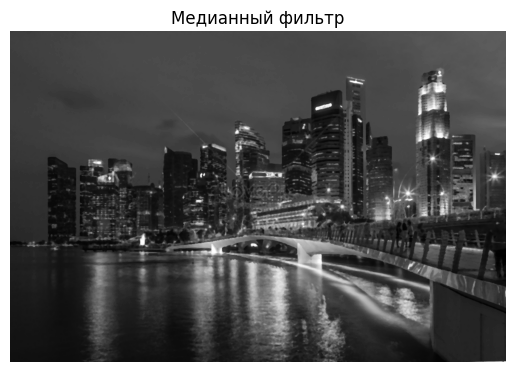

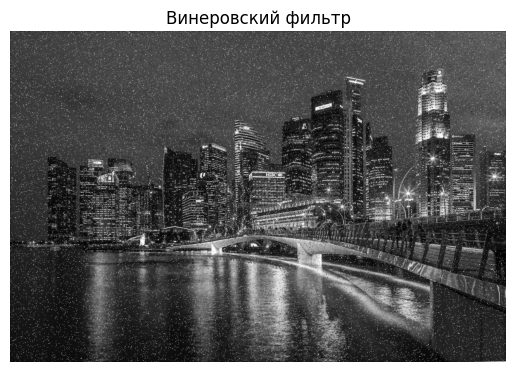

In [ ]:
import cv2
import numpy as np
from skimage.util import random_noise
from scipy.signal import wiener
import matplotlib.pyplot as plt

# Предполагается, что sp_noise_img уже был создан
# Если нужно, убедитесь, что изображение в формате uint8 для медианного фильтра

# Медианный фильтр (OpenCV)
median_filtered = cv2.medianBlur(sp_noise_img, 5)

# Перед применением Винеровского фильтра необходимо нормализовать изображение
sp_noise_img_float = sp_noise_img.astype(np.float64) / 255.0

# Винеровский фильтр (SciPy)
wiener_filtered = wiener(sp_noise_img_float)

# Отображение результатов
# plt.subplot(1, 2, 1)
plt.imshow(median_filtered, cmap='gray')
plt.title("Медианный фильтр")
plt.axis('off')
plt.show()


# plt.subplot(1, 2, 2)
plt.imshow(wiener_filtered, cmap='gray')
plt.title("Винеровский фильтр")
plt.axis('off')
plt.show()


# Высокочастотная фильтрация (выделение контуров)

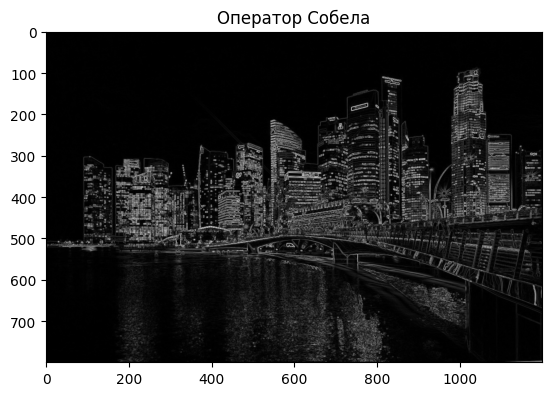

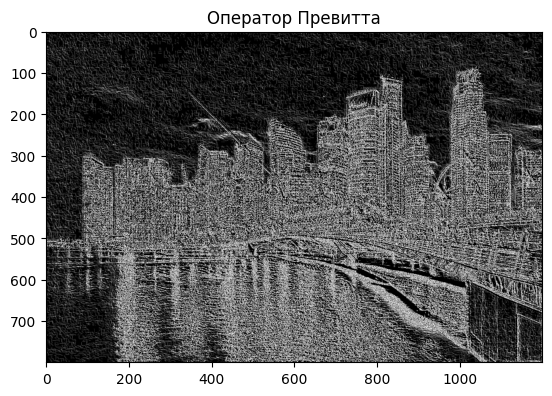

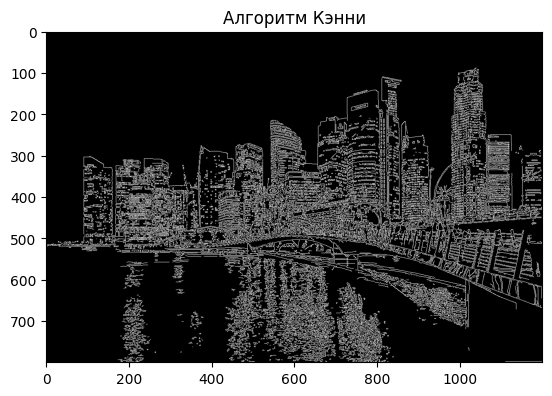

In [ ]:
# Оператор Собела
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Горизонтальные границы
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Вертикальные границы
sobel_combined = np.sqrt(sobelx**2 + sobely**2)

# Оператор Превитта
prewittx = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitty = cv2.filter2D(image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_combined = np.sqrt(prewittx**2 + prewitty**2)

# Алгоритм Кэнни
canny_edges = cv2.Canny(image, 100, 200)

# Отображение результатов
plt.imshow(sobel_combined, cmap='gray')
plt.title("Оператор Собела")
plt.show()

plt.imshow(prewitt_combined, cmap='gray')
plt.title("Оператор Превитта")
plt.show()

plt.imshow(canny_edges, cmap='gray')
plt.title("Алгоритм Кэнни")
plt.show()
